# Uncovering the Factors That Influenced Survival in the Titanic Disaster 

This beginner-friendly project explores the classic Titanic dataset through basic exploratory data analysis (EDA), aiming to uncover factors that influenced survival while providing hands-on practice with Python, pandas, seaborn, and version control using Git and GitHub.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Loading and Exploring the Dataset

In [2]:
# Load dataset
df = pd.read_csv('../data/titanic.csv')

# Display first few rows of the dataset
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [3]:
#Data overview
print("Shape:", df.shape)

df.info()

print("\nMissing values:\n", df.isnull().sum())

Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687


The data is well nstructured and numeric columns already have the appropiate type.

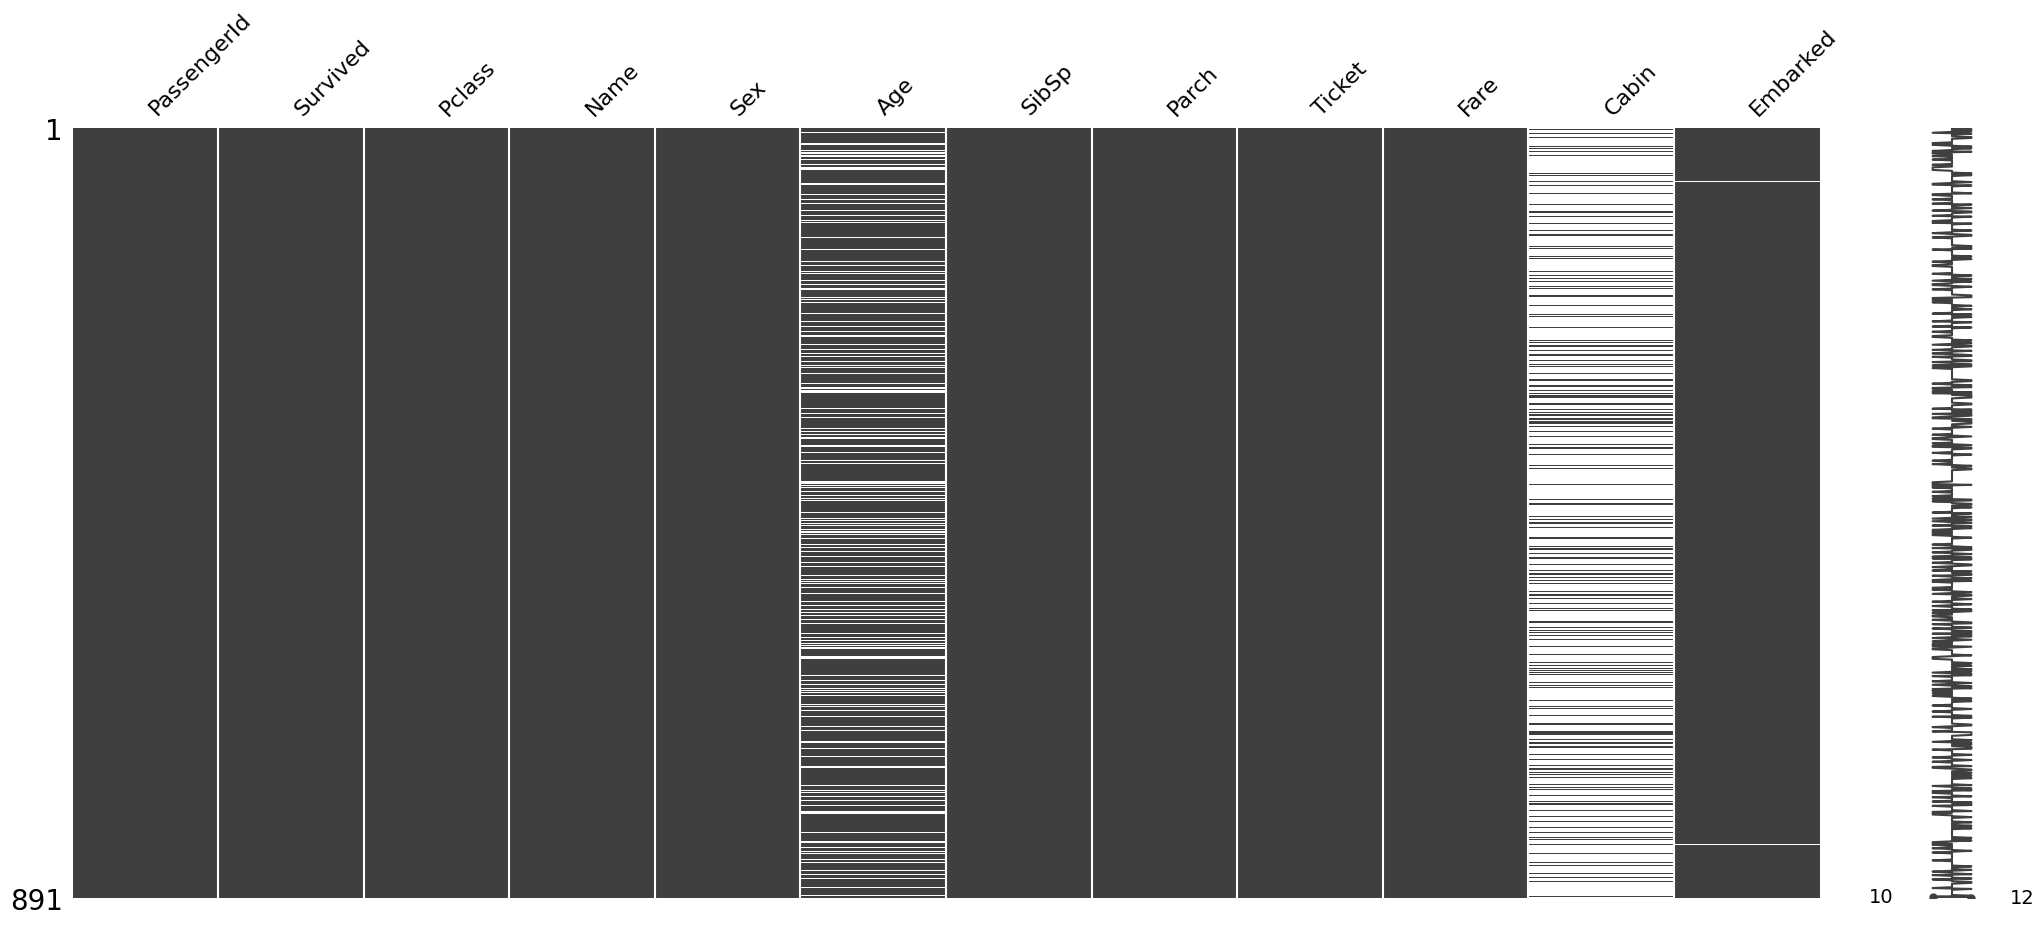

In [4]:
# Visualize missing values
msno.matrix(df)
plt.show()

The "Cabin" column has a significant number of missing values and we don't have a meaningul way of replacing them, so we'll dorp that column for this analysis.

Age on the other hand, has fewer missing values, but we can't drop those rows since the size of the dataset would be significantly reduced and "Age" is also a very relevant feature. We'll replace the missing values with the median since more advaced methods of substitution are out of the scope of this project (haven't acquired those skills yet). This however should be a good way of hadling the missing values without impacting analysis in a meaningful way.

For the "Embarked" column we can also replace missing values with a measure of central tendency, the mode in this case (very few missing).

## Cleaning the data

In [5]:
# Drop "Cabin" column for this analysis due to high number of missing values
df = df.drop(columns=["Cabin"])

# Fill missing values in "Embarked" with the mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().iloc[0])

# Fill missing values in "Age" with the median
df["Age"] = df["Age"].fillna(df["Age"].median())

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA

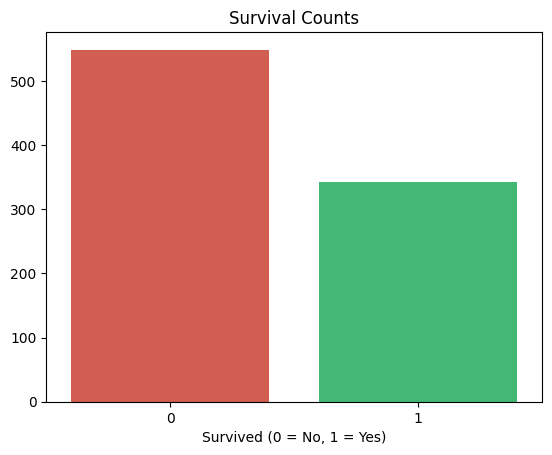

In [6]:
# Quick look at survival count
sns.countplot(
    data=df,
    x="Survived",
    hue="Survived",        
    palette=['#e74c3c', '#2ecc71'],
    legend=False            
)
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("")  # optional: keep y-axis label empty
plt.show()

Most passengers didn't survive.

### Numerical Features

Age Summary:
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


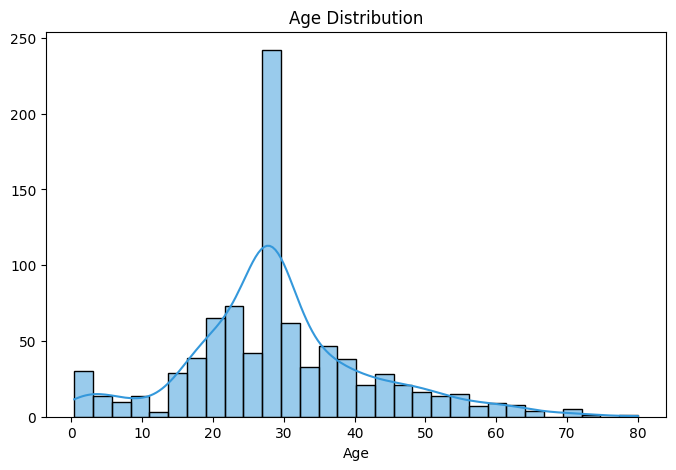


Fare Summary:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


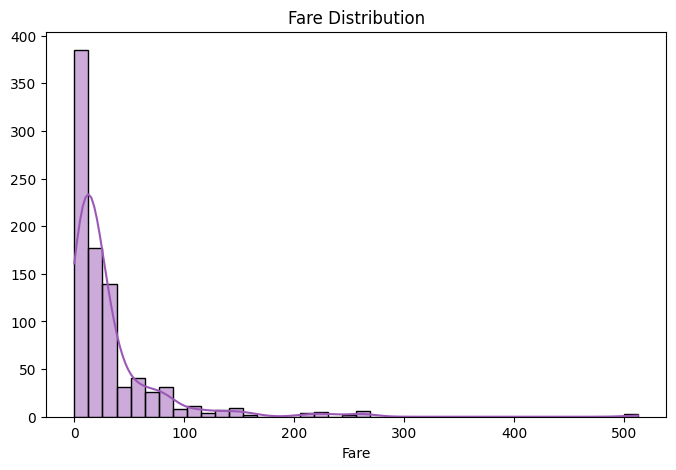

In [7]:
# Distribution of numerical features - "Age" and '"Fare"

# Age
print("Age Summary:")
print(df["Age"].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], kde=True, bins=30, color="#3498db")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("")
plt.show()

# Fare
print("\nFare Summary:")
print(df["Fare"].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df["Fare"], kde=True, bins=40, color="#9b59b6")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("")
plt.show()

- The distribution plot shows how replacing the missing values in the Age column with the median affects the overall shape, which likely followed a roughly normal distribution.

- The fare distribution reveals that most passengers paid relatively low ticket prices, while a smaller group of wealthier individuals could afford higher-class tickets.

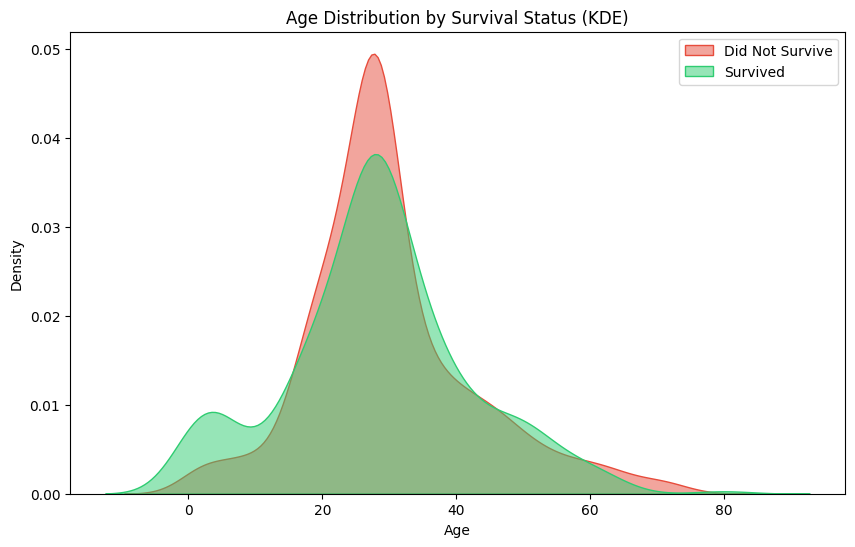

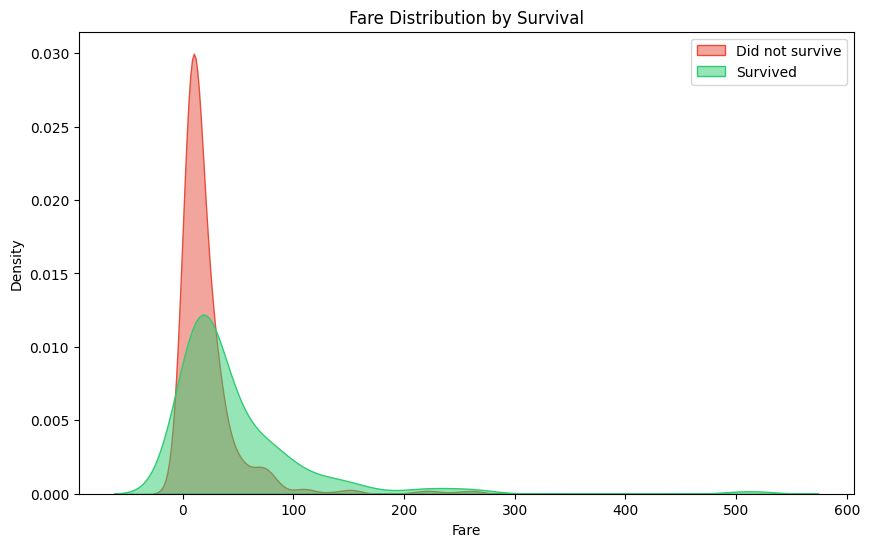

In [8]:
# Survival rate and age distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df["Survived"] == 0], x="Age", fill=True, label="Did Not Survive", color="#e74c3c", alpha=0.5)
sns.kdeplot(data=df[df["Survived"] == 1], x="Age", fill=True, label="Survived", color="#2ecc71", alpha=0.5)
plt.title("Age Distribution by Survival Status (KDE)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

# Survival rate and fare distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df["Survived"] == 0]["Fare"], label="Did not survive", fill=True, alpha=0.5, color="#e74c3c")
sns.kdeplot(data=df[df["Survived"] == 1]["Fare"], label="Survived", fill=True, alpha=0.5, color="#2ecc71")
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()
plt.show()

- The first plot shows that younger passengers - particularly those under 18 - had a higher likelihood of survival.

- The second plot indicates that passengers who paid higher fares generally had better survival rates.

### Categorical Features

In [9]:
# Look at passenger sex 

# Count passengers by sex
print("Total count of male and female passengers")
sex_counts = df["Sex"].value_counts()
print(sex_counts)
print()

# Survival counts by sex
print("Survival counts by sex:")
survival_by_sex = df.groupby("Sex")["Survived"].value_counts().unstack()
print(survival_by_sex)
print()

# Survival rate by sex
print("Survival rate by sex:")
survival_rate_sex = df.groupby("Sex")["Survived"].mean()
print(survival_rate_sex)
print()

Total count of male and female passengers
Sex
male      577
female    314
Name: count, dtype: int64

Survival counts by sex:
Survived    0    1
Sex               
female     81  233
male      468  109

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64



There is a clear difference in survival rates between male and female passengers, with women surviving at a much higher proportion than men.

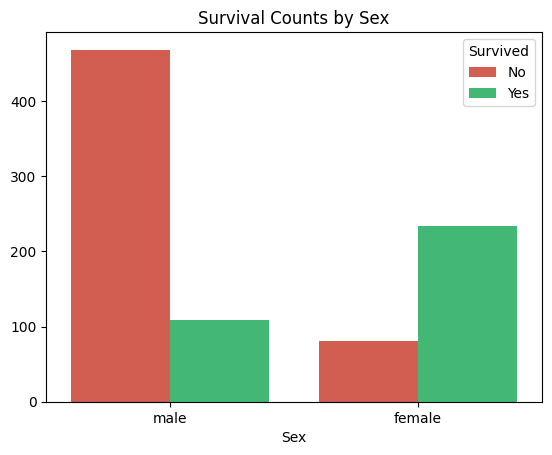

In [10]:
# Visualize survival count by sex
sns.countplot(data=df, x='Sex', hue='Survived', palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Next to make the difference in survival by age easier to interpret we'll create a helper column which will classify passengers as children or non-children.

Survival rates for children vs adults:
IsChild
False    0.361183
True     0.539823
Name: Survived, dtype: float64


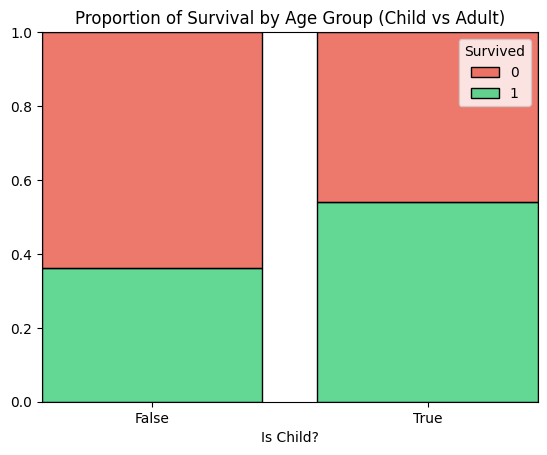

In [11]:
# Look at children/younger passengers specifically - "Woman and children first" policy
df["IsChild"] = df["Age"] < 18

print("Survival rates for children vs adults:")
survival_rates = df.groupby("IsChild")["Survived"].mean()
print(survival_rates)

df["IsChild_str"] = df["IsChild"].astype(str)

sns.histplot(
    data=df,
    x="IsChild_str",
    hue="Survived",
    multiple="fill",
    shrink=0.8,
    palette=["#e74c3c", "#2ecc71"]
)

plt.title("Proportion of Survival by Age Group (Child vs Adult)")
plt.xlabel("Is Child?")
plt.ylabel("")
plt.show()

In [12]:
# Look at passenger class 

# Count passengers by class
print("Passenger counts by class:")
class_counts = df["Pclass"].value_counts()
print(class_counts)
print()

# Survival counts by class
print("Survival counts by class:")
survival_by_class = df.groupby("Pclass")["Survived"].value_counts().unstack()
print(survival_by_class)
print()

# Survival rate by class
print("Survival rate by class:")
survival_rate_class = df.groupby("Pclass")["Survived"].mean()
print(survival_rate_class)
print()

Passenger counts by class:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Survival counts by class:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survival rate by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64



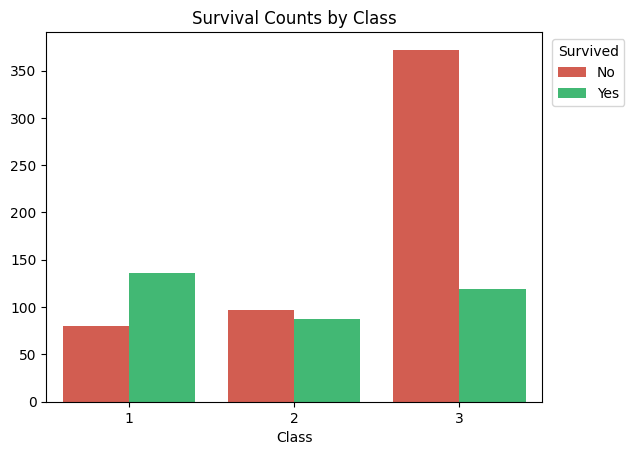

In [13]:
# Visualize survival count by class
sns.countplot(data=df, x="Pclass", hue="Survived", palette=["#e74c3c", "#2ecc71"])
plt.title("Survival Counts by Class")
plt.xlabel("Class")
plt.ylabel("")
plt.legend(title="Survived", labels=["No", "Yes"], loc="upper right", bbox_to_anchor=(1.18, 1))
plt.show()


Consistent with the earlier fare distribution visualization, passengers who could afford higher-class tickets had a greater chance of survival.

## Conclusion

This exploratory analysis of the Titanic dataset highlighted several key factors associated with survival. Women and younger passengers were more likely to survive, while men faced significantly lower chances. Wealth also played a role, as those who could afford higher-class tickets and fares had better survival rates.